# Data Wrangling - Cirugia de los datos

##### El data wrangling, a veces denominado data munging, es el proceso de transformar y mapear datos de un dataset raw en otro con la intencion de hacerlo mas apropiado y valioso para una variedad de propositos posteriores, como el analisis. Un data wrangler es una persona que realiza estas operaciones de transformacion.

##### Esto puede incluir munging, visualizacion de datos, agregacion de datos, entrenamiento de un modelo estadistico, asi como muchos otros usos potenciales. La oscilacion de datos como proceso generalmente sigue un conjunto de pasos generales que comienzan extrayendo los datos en forma cruda del origen de datos, dividiendo los datos brutos usando algoritmos o analizando los datos en estructuras de datos predefinidas, y finalmente depositando el contenido resultante en un sistema de almacenamiento para su uso futuro. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Crear subconjunto de datos

In [4]:
account_lenght = data["Account Length"]

In [5]:
account_lenght.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [6]:
type(account_lenght)

pandas.core.series.Series

In [7]:
subset = data[["Account Length", "Phone", "Eve Charge", "Day Calls"]]

In [8]:
subset.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [9]:
type(subset)

pandas.core.frame.DataFrame

In [10]:
desired_columns = ["Account Length", "VMail Message", "Day Calls"]
desired_columns

['Account Length', 'VMail Message', 'Day Calls']

In [11]:
all_columns_list = data.columns.values.tolist()
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [12]:
sublist = [i for i in all_columns_list if i not in desired_columns]
sublist

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [13]:
subset = data[sublist]
subset.head()

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
data[1:25]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.


In [15]:
data[10:35]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
11,RI,74,415,344-9403,no,no,0,187.7,127,31.91,...,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False.
12,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False.
13,MT,95,510,394-8006,no,no,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,False.
14,IA,62,415,366-9238,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
16,ID,85,408,350-8884,no,yes,27,196.4,139,33.39,...,90,23.88,89.3,75,4.02,13.8,4,3.73,1,False.
17,VT,93,510,386-2923,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False.
18,VA,76,510,356-2992,no,yes,33,189.7,66,32.25,...,65,18.09,165.7,108,7.46,10.0,5,2.70,1,False.
19,TX,73,415,373-2782,no,no,0,224.4,90,38.15,...,88,13.56,192.8,74,8.68,13.0,2,3.51,1,False.


In [16]:
data[:4]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.


In [17]:
data[3320:]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True.
3321,VT,60,415,400-2738,no,no,0,193.9,118,32.96,...,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False.
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True.
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True.
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False.
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False.
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False.
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False.
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.


## Usuarios con Total Mins > 500

In [18]:
data1 = data[data["Day Mins"] > 300]

In [19]:
data1

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,...,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True.
230,MD,93,408,360-3324,yes,no,0,312.0,109,53.04,...,100,11.00,217.6,74,9.79,10.5,2,2.84,0,True.
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,...,114,22.18,312.1,89,14.04,5.3,3,1.43,1,True.
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True.
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False.
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,False.
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True.


## Usuarios de New York (State = "NY")

In [20]:
data2 = data[data["State"] == "NY"]

In [21]:
data2

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,...,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,NY,150,415,421-6268,no,yes,35,139.6,72,23.73,...,170,28.29,213.8,105,9.62,8.8,2,2.38,2,False.
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,...,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,...,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.


In [22]:
data3 = data[
    (data["Day Mins"] > 300) & (data["State"] == "NY")
    ]

In [23]:
data3.shape

(2, 21)

In [24]:
data4 = data[
    (data["Day Mins"] > 300) | (data["State"] == "NY")
    ]

In [25]:
data4.shape

(124, 21)

### Minutos de dia, de noche y longitud de la cuenta de los primeros 50 individuos

In [26]:
subset_first_50 = data[["Day Mins", "Night Mins", "Account Length"]][:50]
subset_first_50.shape

(50, 3)

## Loc e ILoc

In [27]:
data.iloc[1:10, 3:6]

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [28]:
data.loc[1:10, ["Phone", "VMail Plan"]]

,Phone,VMail Plan
1,371-7191,yes
2,358-1921,no
3,375-9999,no
4,330-6626,no
5,391-8027,no
6,355-9993,yes
7,329-9001,no
8,335-4719,no
9,330-8173,yes
10,329-6603,no


In [29]:
data["Total Mins"] = data["Day Mins"] + data["Night Mins"] + data["Eve Mins"]

In [30]:
data["Total Mins"]

0       707.2
1       611.5
2       527.2
3       558.2
4       501.9
        ...  
3328    650.8
3329    575.8
3330    661.5
3331    512.6
3332    741.7
Name: Total Mins, Length: 3333, dtype: float64

In [31]:
data["Total Calls"] = data["Day Calls"] + data["Night Calls"] + data["Eve Calls"]

In [32]:
data["Total Calls"]

0       300
1       329
2       328
3       248
4       356
       ... 
3328    286
3329    235
3330    258
3331    326
3332    272
Name: Total Calls, Length: 3333, dtype: int64

## Generacion aleatoria de numeros

In [33]:
np.random.randint(1,100)

78

In [34]:
np.random.random()

0.9154493712376797

In [35]:
def randint_list(n, a, b):
    x = []
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

In [36]:
randint_list(5, 3,13)

[6, 11, 5, 5, 12]

In [37]:
import random

In [38]:
random.randrange(0,100, 7)

70

In [39]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [40]:
np.random.shuffle(a)
a

array([80, 53, 63, 36, 99, 91, 43, 22,  8, 98, 41, 66, 25, 75, 24, 84, 82,
       11, 90, 13, 88, 30, 76, 74, 65, 89, 83, 26, 52, 14, 20, 96, 58, 95,
       49, 46, 23, 47, 62, 17, 73, 31,  9, 93, 68,  7, 48, 57, 19, 15, 78,
       79, 42, 60, 40, 59, 56, 28, 87,  4, 29,  6,  0, 72,  5, 67, 69, 37,
       94, 81, 12, 38, 97, 71, 61, 18, 92, 77, 34, 39, 10,  3,  1, 50, 55,
       85, 27, 70, 44, 86, 32, 21, 54, 35, 64, 16, 33, 51,  2, 45])

In [41]:
np.random.choice(a)

80

In [42]:
data.shape

(3333, 23)

In [43]:
column_list = data.columns.values.tolist()

In [44]:
column_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?',
 'Total Mins',
 'Total Calls']

In [45]:
np.random.choice(column_list)

'Intl Calls'

## Seed

In [46]:
np.random.seed(2019)
for i in range(5):
    print(np.random.random())

0.9034822144192743
0.3930805066502425
0.6239699612977534
0.6378774010222266
0.8804990687782621


## Distribucion Uniforme a < b

In [47]:
a = 1
b = 100
n = 10000000
data = np.random.uniform(a,b,n)

In [48]:
%matplotlib inline

(array([1000519.,  999087., 1000001.,  998632., 1001161., 1001286.,
         999798.,  999642., 1000366.,  999508.]),
 array([ 1.00000646, 10.90000331, 20.80000016, 30.69999701, 40.59999385,
        50.4999907 , 60.39998755, 70.29998439, 80.19998124, 90.09997809,
        99.99997494]),
 <a list of 10 Patch objects>)

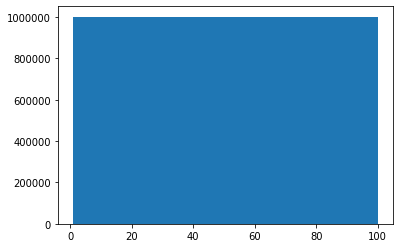

In [49]:
plt.hist(data)

## Distribucion Normal

In [50]:
data = np.random.randn(100000)

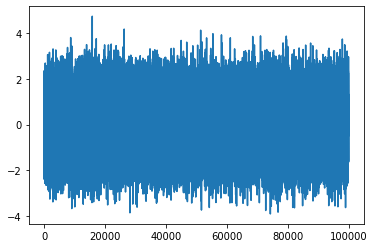

In [51]:
x = range(1, 100001)
plt.plot(x, data)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   3.,
          0.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,   2.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   2.,   1.,   1.,   0.,   1.,   3.,
          2.,   2.,   2.,   0.,   0.,   1.,   2.,   3.,   1.,   1.,   1.,
          1.,   2.,   1.,   3.,   2.,   2.,   1.,   1.,   2.,   6.,   3.,
          1.,   0.,   2.,   2.,   2.,   2.,   2.,   1.,   2.,   2.,   2.,
          0.,   1.,   1.,   5.,   3.,   1.,   4.,   1.,   5.,   2.,   4.,
          2.,   3.,   5.,   4.,   7.,   1.,   2.,   4.,   5.,   4.,   6.,
          3.,   2.,   5.,   5.,   6.,   7.,   5.,   5.,   7.,   6.,   7.,
          6.,   8.,   6.,   6.,   4.,   8.,   4.,   7.,   8.,   5.,  13.,
          4.,   6.,  11.,  11.,   6.,   5.,   5.,   5.,  11.,   9.,   9.,
         11.,   7.,   7.,  11.,   8., 

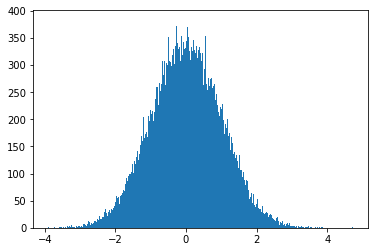

In [52]:
plt.hist(data, bins=1000)

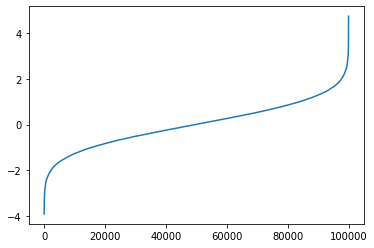

In [53]:
plt.plot(x, sorted(data))

(array([2.6000e+01, 4.6900e+02, 3.5080e+03, 1.4193e+04, 2.9376e+04,
        3.0685e+04, 1.6560e+04, 4.5680e+03, 5.7300e+02, 4.2000e+01]),
 array([-5.18648747, -3.07894501, -0.97140255,  1.13613991,  3.24368237,
         5.35122484,  7.4587673 ,  9.56630976, 11.67385222, 13.78139468,
        15.88893714]),
 <a list of 10 Patch objects>)

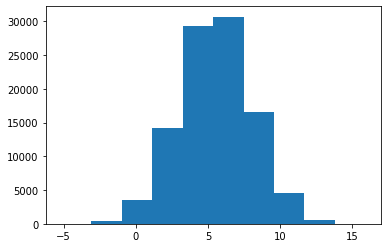

In [54]:
mu = 5.5
sd = 2.5
data = 5.5 + 2.5 *np.random.randn(100000)
plt.hist(data)

## La simulacion de Monte Carlo

3.146760000000001


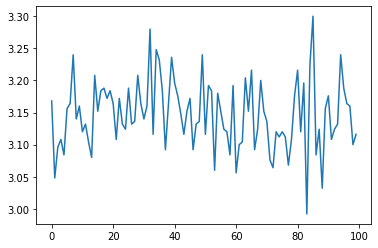

In [55]:
pi_avg = 0
pi_value_list = []
n = 1000
for i in range(100):
    value = 0
    x = np.random.uniform(0,1,n).tolist()
    y = np.random.uniform(0,1,n).tolist()
    for j in range(n):
        z = np.sqrt(x[j] * x[j] + y[j] * y[j])
        if z<=1:
            value += 1
    float_value = float(value)
    pi_value = float_value * 4 / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value
pi = pi_avg/100

print(pi)
plt.plot(pi_value_list)

## Dummy Data Sets

In [56]:
data = pd.DataFrame(
    {
        'A' : np.random.randn(10000),
        'B' : 1.5 + 2.5 + np.random.randn(10000),
        'c' : np.random.uniform(5,32, 10000)
    }
)

In [57]:
data.describe()

,A,B,c
count,10000.000000,10000.000000,10000.000000
mean,0.006203,3.998330,18.458801
std,0.995394,1.011430,7.777224
min,-4.016829,0.540930,5.003076
25%,-0.667238,3.328201,11.681181
50%,0.010130,3.998413,18.400617
75%,0.670959,4.670918,25.144634
max,3.750742,7.696810,31.998586


In [58]:
data = pd.read_csv("../python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [59]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [60]:
column_names = data.columns.values.tolist()

In [61]:
a = len(column_names)
a

21

In [62]:
new_data = pd.DataFrame(
    {
    'Column Name': column_names,
    'A' : np.random.randn(a),
    'B' : np.random.uniform(0,1,a)
    })

In [63]:
new_data.head()

,Column Name,A,B
0,State,-1.208012,0.536676
1,Account Length,1.345554,0.725167
2,Area Code,-0.029373,0.420407
3,Phone,-0.293383,0.681511
4,Int'l Plan,-0.918958,0.848412


## Agregacion de datos por categoria

In [64]:
gender = ["male", "female"]
income = ["poor", "middle class", "rich"]

In [65]:
n = 500

gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [66]:
# z => N(0)
# N(m, s) => m + s * z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [67]:
data = pd.DataFrame(
{
    "Gender": gender_data,
    "Economic Status": income_data,
    "Height": height,
    "Weight" : weight,
    "Age": age,
    "Income": income,
})

In [68]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,male,middle class,189.949106,78.129848,21.687454,19974.326555
1,female,poor,135.224596,61.700305,49.381788,17364.250277
2,male,middle class,187.670099,32.917614,42.769517,18588.944364
3,male,rich,178.055611,50.697593,43.161510,19910.651717
4,male,middle class,189.770732,83.446335,44.297034,17974.230349


## Agrupacion de datos

In [69]:
grouped_gender = data.groupby("Gender")

In [70]:
grouped_gender.groups

{'female': Int64Index([  1,   6,   7,  10,  11,  12,  13,  16,  17,  18,
             ...
             477, 478, 479, 483, 488, 490, 491, 494, 495, 499],
            dtype='int64', length=248),
 'male': Int64Index([  0,   2,   3,   4,   5,   8,   9,  14,  15,  20,
             ...
             484, 485, 486, 487, 489, 492, 493, 496, 497, 498],
            dtype='int64', length=252)}

In [71]:
for name, groups in grouped_gender:
    print(name)
    print(groups)

female
     Gender Economic Status      Height      Weight        Age        Income
1    female            poor  135.224596   61.700305  49.381788  17364.250277
6    female    middle class  158.792417   94.710670  35.887048  18911.352456
7    female            poor  194.536885  118.069052  37.653361  14338.767389
10   female    middle class  105.966930   95.601115  -6.459621  19580.737403
11   female            rich  155.120372   93.851572  22.616973  16972.608512
..      ...             ...         ...         ...        ...           ...
490  female            rich  123.290364  110.518616  35.428101  14050.376119
491  female            poor  206.742511   94.536669  21.742036  10960.918426
494  female            poor  129.419646   73.673850  16.029390  21076.457290
495  female            poor  177.685501   43.992003  28.375833  14217.596162
499  female            poor  152.335526   59.454801  17.392281  19522.289618

[248 rows x 6 columns]
male
    Gender Economic Status      Height  

In [72]:
grouped_gender.get_group("female")

,Gender,Economic Status,Height,Weight,Age,Income
1,female,poor,135.224596,61.700305,49.381788,17364.250277
6,female,middle class,158.792417,94.710670,35.887048,18911.352456
7,female,poor,194.536885,118.069052,37.653361,14338.767389
10,female,middle class,105.966930,95.601115,-6.459621,19580.737403
11,female,rich,155.120372,93.851572,22.616973,16972.608512
...,...,...,...,...,...,...
490,female,rich,123.290364,110.518616,35.428101,14050.376119
491,female,poor,206.742511,94.536669,21.742036,10960.918426
494,female,poor,129.419646,73.673850,16.029390,21076.457290
495,female,poor,177.685501,43.992003,28.375833,14217.596162


In [73]:
double_group = data.groupby(["Gender", "Economic Status"])
len(double_group)

6

In [74]:
for names, groups in double_group:
    print(names)
    print(groups)

('female', 'middle class')
     Gender Economic Status      Height      Weight        Age        Income
6    female    middle class  158.792417   94.710670  35.887048  18911.352456
10   female    middle class  105.966930   95.601115  -6.459621  19580.737403
16   female    middle class  158.789325   76.051371  28.522235  19910.075820
17   female    middle class  145.063313  100.819833  27.340940  19696.409544
25   female    middle class  187.464689   38.736522  31.534066  19813.647157
..      ...             ...         ...         ...        ...           ...
473  female    middle class  143.601454   83.748291  26.988134  15320.104195
475  female    middle class  183.513966   96.928110  23.383606  18062.238049
477  female    middle class  171.087100   61.839533  22.358510  15197.901258
478  female    middle class  185.998685   44.512013  29.240523  19827.933487
488  female    middle class  230.602316   29.723022  39.851616  18207.284037

[85 rows x 6 columns]
('female', 'poor')
     Ge

## Operaciones sobre datos agrupados

In [75]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
female middle class     13556.989558  5581.904849  2621.228480  1.485887e+06
       poor             14200.866880  6078.135667  2580.331665  1.566332e+06
       rich             11713.408281  4934.661732  2140.362648  1.344067e+06
male   middle class     13205.187489  5733.482572  2486.466197  1.425852e+06
       poor             14526.638004  5904.260675  2692.773416  1.617311e+06
       rich             12499.813854  5403.666807  2530.791294  1.410323e+06

In [76]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
female middle class     159.493995  65.669469  30.837982  17481.020749
       poor             161.373487  69.069723  29.321951  17799.221787
       rich             156.178777  65.795490  28.538169  17920.898147
male   middle class     161.038872  69.920519  30.322758  17388.436461
       poor             159.633385  64.881985  29.590917  17772.650003
       rich             158.225492  68.400846  32.035333  17852.192296

In [77]:
double_group.size()

Gender  Economic Status
female  middle class       85
        poor               88
        rich               75
male    middle class       82
        poor               91
        rich               79
dtype: int64

In [78]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
female middle class      85.0  159.493995  31.957172   79.557426  139.963548   
       poor              88.0  161.373487  29.944091   85.896115  145.872935   
       rich              75.0  156.178777  31.702861   56.667556  135.221698   
male   middle class      82.0  161.038872  30.194587  100.152552  140.076199   
       poor              91.0  159.633385  32.194217   67.428678  138.035175   
       rich              79.0  158.225492  27.720422  100.562593  134.955275   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
female middle class     160.925586  183.513966  230.602316   85.0  65.669469   
       poor             162.830939  179.873184  254.708582   88.0  69.069723   
       rich             154.191176  178.630520  222.112984   75.0  65.795490   
male   middle class     155.818454  184.133452  238.111223   82.0  69.920519   
       poor             160.617235  178.374202  269.602787   91.0  64.881985   
       rich             158.442662  182.928465  223.692874   79.0  68.400846   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
female middle class     ...  38.062569  62.706313   85.0  17481.020749   
       poor             ...  37.728283  56.437984   88.0  17799.221787   
       rich             ...  35.146092  56.039751   75.0  17920.898147   
male   middle class     ...  37.374903  54.730726   82.0  17388.436461   
       poor             ...  36.922282  63.681104   91.0  17772.650003   
       rich             ...  37.942216  63.132410   79.0  17852.192296   

                                                                              \
                                std          min           25%           50%   
Gender Economic Status                                                         
female middle class     3408.532381  7337.064429  15320.104195  17849.880022   
       poor             3434.183751  8933.027872  14858.649643  17927.856432   
       rich             3745.602851  8283.776751  15052.024834  17993.391529   
male   middle class     3527.500290  8930.208771  14693.937671  17327.187894   
       poor             3602.590872  8578.723588  15446.211150  17696.045481   
       rich             3326.736520  9586.421495  15799.404374  17517.167341   

                                                    
                                 75%           max  
Gender Economic Status                              
female middle class     19696.409544  24271.543122  
       poor             20135.196952  26244.167345  
       rich             20885.736347  25444.847528  
male   middle class     19949.796824  27698.554601  
       poor             20195.042448  25097.629942  
       rich             19910.708661  25085.871862  

[6 rows x 32 columns]

In [79]:
grouped_income = double_group["Income"]

In [80]:
grouped_income.describe()

count          mean          std          min  \
Gender Economic Status                                                  
female middle class      85.0  17481.020749  3408.532381  7337.064429   
       poor              88.0  17799.221787  3434.183751  8933.027872   
       rich              75.0  17920.898147  3745.602851  8283.776751   
male   middle class      82.0  17388.436461  3527.500290  8930.208771   
       poor              91.0  17772.650003  3602.590872  8578.723588   
       rich              79.0  17852.192296  3326.736520  9586.421495   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
female middle class     15320.104195  17849.880022  19696.409544  24271.543122  
       poor             14858.649643  17927.856432  20135.196952  26244.167345  
       rich             15052.024834  17993.391529  20885.736347  25444.847528  
male   middle class     14693.937671  17327.187894  19949.796824  27698.554601  
       poor             15446.211150  17696.045481  20195.042448  25097.629942  
       rich             15799.404374  17517.167341  19910.708661  25085.871862

In [81]:
double_group.aggregate({
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic Status                                    
female middle class     1.485887e+06  30.837982  31.957172
       poor             1.566332e+06  29.321951  29.944091
       rich             1.344067e+06  28.538169  31.702861
male   middle class     1.425852e+06  30.322758  30.194587
       poor             1.617311e+06  29.590917  32.194217
       rich             1.410323e+06  32.035333  27.720422

In [82]:
double_group.aggregate({
    "Age": np.mean,
    "Height": lambda h : np.mean(h) / np.std(h)
})

Age    Height
Gender Economic Status                     
female middle class     30.837982  5.020487
       poor             29.321951  5.420043
       rich             28.538169  4.959505
male   middle class     30.322758  5.366190
       poor             29.590917  4.985920
       rich             32.035333  5.744376

## Filtrado de datos

In [83]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      21.687454
1      49.381788
2      42.769517
3      43.161510
4      44.297034
         ...    
495    28.375833
496    24.626890
497    38.685946
498    20.057348
499    17.392281
Name: Age, Length: 425, dtype: float64

## Transformacion de datos

In [84]:
zscore = lambda x: (x - x.mean())/ x.std()

In [85]:
z_group = double_group.transform(zscore)

(array([  7.,   8.,  32.,  58.,  99., 127.,  91.,  49.,  14.,  15.]),
 array([-3.01828102, -2.45223918, -1.88619735, -1.32015552, -0.75411368,
        -0.18807185,  0.37796998,  0.94401182,  1.51005365,  2.07609548,
         2.64213731]),
 <a list of 10 Patch objects>)

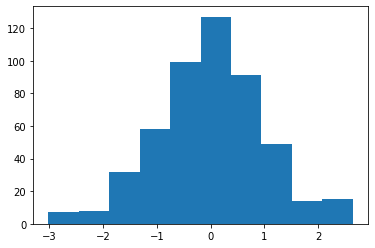

In [86]:
plt.hist(z_group["Age"])

In [87]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [88]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,189.949106,78.129848,21.687454,19974.326555
1,135.224596,61.700305,49.381788,17364.250277
2,187.670099,32.917614,42.769517,18588.944364
3,178.055611,50.697593,43.161510,19910.651717
4,189.770732,83.446335,44.297034,17974.230349
...,...,...,...,...
495,177.685501,43.992003,28.375833,14217.596162
496,157.114643,65.174790,24.626890,19855.412114
497,176.528512,35.387242,38.685946,17629.006964
498,186.030220,10.018434,20.057348,13539.413439


## Operaciones diversas muy utiles

In [89]:
double_group.nth(32)

Height      Weight        Age        Income
Gender Economic Status                                                 
female middle class     103.200311   61.224497  25.216733  15142.820147
       poor             185.187837  103.795922  22.069496  17592.601988
       rich             127.979050    9.880769  38.747655   8283.776751
male   middle class     114.126188   60.807454  31.669900  15042.496494
       poor             121.292913   79.585282  29.326456  18227.097929
       rich             191.727449   58.977642  33.709355  19433.785371

In [90]:
data_sorted = data.sort_values(["Age", "Income"])

In [91]:
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
10,female,middle class,105.966930,95.601115,-6.459621,19580.737403
347,female,middle class,185.969055,78.561965,-4.647343,17092.945821
54,male,poor,173.009350,55.641288,-3.722916,19105.677632
298,female,rich,148.192974,81.624797,-3.232241,14409.543869
41,male,poor,147.697496,88.317968,-0.912941,18530.862260


## Conjunto de entrenamiento y conjunto de testing

In [95]:
data = pd.read_csv("../python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [96]:
data.shape

(3333, 21)

## Dividir utilizando la distribucion normal

In [98]:
a = np.random.randn(len(data))

(array([ 13.,  60., 246., 630., 819., 862., 491., 166.,  37.,   9.]),
 array([-3.39823038, -2.70208989, -2.0059494 , -1.30980891, -0.61366843,
         0.08247206,  0.77861255,  1.47475304,  2.17089353,  2.86703401,
         3.5631745 ]),
 <a list of 10 Patch objects>)

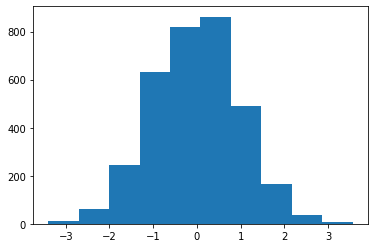

In [99]:
plt.hist(a)

In [108]:
check = (a<0.75)

In [109]:
check

array([False, False, False, ...,  True,  True,  True])

In [110]:
training = data[check]
testing = data[~check]

In [111]:
len(testing)

732

In [112]:
len(training)

2601

## Usando la libreria sklearn

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
train, test = train_test_split(data)

In [115]:
len(train)

2499

In [116]:
len(test)

834

## Usando una funcion de shuffle

In [117]:
import numpy as np

In [118]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [119]:
import sklearn

In [121]:
data_shuffle = sklearn.utils.shuffle(data)

In [122]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id + 1:]

In [123]:
len(train_data)

2499

In [124]:
len(test_data)

833